# Fandango Movie Ratings Review

In October 2015, data journalist Walt Hickey uncovered evidence suggesting that the movie ratings on Fandango was biased and dishonest. Essentially, the website was almost always rounding up the movie ratings aggregated to the nearest half star (eg. 4.1 rounded up to 45). In a smaller portion of instances, it was rounded up to the nearest whole star (eg. 4.5 rounded up to 5). As per the frequency distributions, the displayed ratings were in fact further left skewed than the actual ratings.

Fandango reported that this was due to a glitch in the pages' HTML, and the bug would be fixed. The purpose of this project is to determine if any changes were implemented in the rating system post Hickey's analysis.

## Fandango Data
One way to figure out if there have been changes is to compare the data available after the analysis with that of the data before (or used for) the analysis. Hickey has made the data he analyzed publicly available, and DQ staff collected the data from after the analysis as well.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange

wh_data = pd.read_csv('fandango_score_comparison.csv')
dq_data = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
wh_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
dq_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We can see that both the datasets have more data than what we require for the analysis. We'll pick only the columns of interest - specifically those that are related to the fandango score alone.

In [4]:
score_before = wh_data[['FILM', 'Fandango_Stars'
                        , 'Fandango_Ratingvalue'
                        , 'Fandango_votes'
                        , 'Fandango_Difference']]
score_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
score_after = dq_data[['movie', 'year', 'fandango']]
score_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


DQ's data contains the rating details of 214 of the most popular movies released in 2016 and 2017 with a significant number of reviews. Hickey's data contains ratings of every film that has at least 30 Fandango reviews as of 2015. Neither sample is unlikely representative of the population [due to purposive sampling for original research] we're interested in describing. 

## Changing goal of analysis
Instead of scrapping the data entirely, we could tweak our population for the analysis. We could test the ratings for popular movies in 2015 vs popular movies in 2016/17. We know Hickey's data consists of movies that had at least 30 Fandango reviews. We don't have the number of ratings in the DQ data. For this we can test a sample and check with the Fandango site to see the number of reviews they have

In [6]:
score_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of this writing, the Fandango movie reviews were not available. Using the 'WaybackArchive' we attempted to retrieve the number of reviews. For most of these, there were a significant number of reviews.

We will need to check the population and ensure the before population only has movies from 2015, and the after population has only those from 2016. 

In [7]:
score_before['FILM'].str[-5:-1].value_counts()

2015    129
2014     17
Name: FILM, dtype: int64

17 movies in the list were from 2014. We shall remove these from our population

In [8]:
fandango_2015 = (score_before[score_before['FILM']
                             .str[-5:-1]=='2015'])

In [9]:
score_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

23 movies in the after population has movies from 2017. These will also be removed from our population.

In [10]:
fandango_2016 = score_after[score_after['year']==2016]

## Analyzing the samples

As with any other analysis, we'll start with a high level description of the data at hand, and drill down as needed. A KD plot will help with visualizing the distribution of the ratings across both samples.

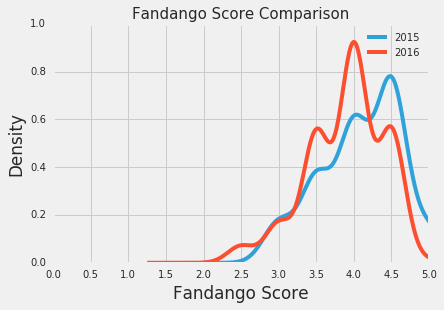

In [11]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016',legend=True)
plt.xlim([0,5])
plt.title('Fandango Score Comparison', fontdict={'fontsize':15})
plt.xlabel('Fandango Score')
plt.xticks(arange(0,5.1,.5))
plt.show()

We can see the shapes for both plots are similar. Ratings for both years are skewed left, indicating that in Fandango reviewers tend to rate movies higher. That being said, the 2016 reviews for popular movies is slightly lower.

In [12]:
((fandango_2015['Fandango_Stars']
  .value_counts(normalize=True))*100).sort_index()

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
((fandango_2016['fandango']
  .value_counts(normalize=True))*100).sort_index()

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the above 2 tables, we can see that the 4.5 and 5 star ratings significantly dropped in 2016. Additionally, there was a significant increase in ratings 4 and lower (and particularly under 3 stars). 

In [14]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

In [15]:
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

In [17]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


The mean star rating dropped by 0.2 stars, the median remained the same, and the mode dropped by 0.5 stars. The star ratings overall were lower in 2016 but not by a lot. 

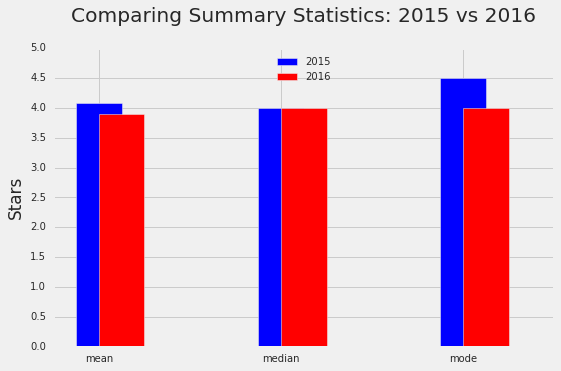

In [34]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color='blue', align='center', label='2015', width=0.25, legend=True)
summary['2016'].plot.bar(color='red', align='edge', label='2016', width=0.25, legend=True, rot=0, figsize=(8,5))
plt.title('Comparing Summary Statistics: 2015 vs 2016', y=1.07)
plt.ylim([0,5])
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')